# Week 4.2 Assignment
- Joshua Burden
- Bellevue University
- DSC550 Data Mining
- Dr. Brett Werner
- 09/25/2022

In [25]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt


## Load the data as a Pandas data frame and ensure that it imported correctly.


In [3]:
df = pd.read_csv('./DATA/auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## Begin by prepping the data for modeling:
- #### Remove the car name column.
- #### The horsepower column values likely imported as a string data type. Figure out why and replace any strings with the column mean.
- #### Create dummy variables for the origin column.


In [4]:
# Drop the column
df = df.drop('car name', 1)

# Validate the drop worked correctly
df.head()

C:\Users\Joshu\AppData\Local\Temp\ipykernel_8236\1306409664.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('car name', 1)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [5]:
# Obtain the counts of each value in the hosepower column
df.groupby('horsepower').count()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
horsepower,,,,,,,
100,17,17,17,17,17,17,17
102,1,1,1,1,1,1,1
103,1,1,1,1,1,1,1
105,12,12,12,12,12,12,12
107,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
95,14,14,14,14,14,14,14
96,3,3,3,3,3,3,3
97,9,9,9,9,9,9,9


In [6]:
# Replace the ? with NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Show NaN values for horsepower
df[df['horsepower'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,1
126,21.0,6,200.0,NaN,2875,17.0,74,1
330,40.9,4,85.0,NaN,1835,17.3,80,2
336,23.6,4,140.0,NaN,2905,14.3,80,1
354,34.5,4,100.0,NaN,2320,15.8,81,2
374,23.0,4,151.0,NaN,3035,20.5,82,1


In [7]:
# Calculate the mean horsepower
hp_mean = df['horsepower'].mean()

# Replace NaN with the mean
df['horsepower'] = df['horsepower'].fillna(hp_mean)

# View row 32 to validate horsepower replacement with mean
df.iloc[[32]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,104.469388,2046,19.0,71,1


In [8]:
# Add dummy variables for origin column to original dataframe
df = pd.concat([df, pd.get_dummies(df['origin'])], axis=1)

# View dataframe
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,1,2,3
0,18.0,8,307.0,130.0,3504,12.0,70,1,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,1,0,0


## Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?


In [9]:
# Build correlation matrix
corrM = df.corr()

# Display correlation matrix
corrM

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,1,2,3
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450,-0.568192,0.259022,0.442174
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543,0.604351,-0.352861,-0.396479
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409,0.651407,-0.373886,-0.433505
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669,0.486083,-0.281258,-0.321325
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024,0.598398,-0.298843,-0.440817
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873,-0.250806,0.204473,0.109144
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662,-0.139883,-0.024489,0.193101
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000,-0.924486,0.246332,0.886596
1,-0.568192,0.604351,0.651407,0.486083,0.598398,-0.250806,-0.139883,-0.924486,1.000000,-0.597198,-0.643317
2,0.259022,-0.352861,-0.373886,-0.281258,-0.298843,0.204473,-0.024489,0.246332,-0.597198,1.000000,-0.229895


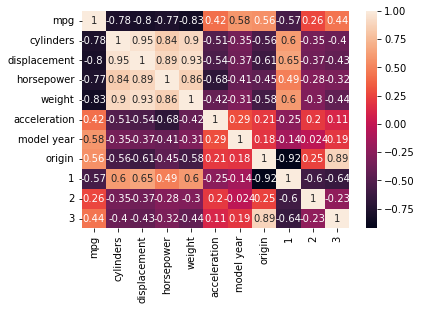

In [15]:



# using the correlation_mat above, create a visualization using a heatmap
sns.heatmap(corrM, annot = True)
plt.show()

## Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.


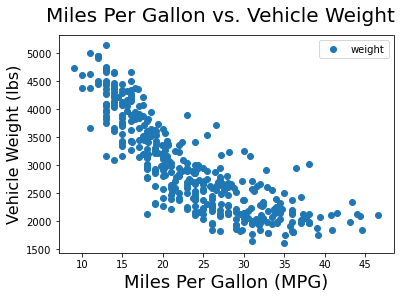

In [16]:
# Create a plot of mpg vs. weight
df.plot(x='mpg', y='weight', style='o')
plt.suptitle('Miles Per Gallon vs. Vehicle Weight', fontsize=20)
plt.xlabel('Miles Per Gallon (MPG)', fontsize=18)
plt.ylabel('Vehicle Weight (lbs)', fontsize=16)
plt.savefig('MPGWeight.jpg')


# Randomly split the data into 80% training data and 20% test data, where your target is mpg.


In [18]:
# Create x & y arrays
x = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 1, 2, 3]]
y = df['mpg']

# Create training & test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

## Train an ordinary linear regression on the training data.


In [14]:
# Import libraries
from sklearn.linear_model import LinearRegression

# create a model
model = LinearRegression()
model.fit(x_train, y_train)

# View model coefficients
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

c:\Users\Joshu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,Coeff
cylinders,-0.176464
displacement,0.014260
horsepower,-0.006971
weight,-0.006684
acceleration,0.100501
model year,0.750472
1,-1.796449
2,0.494659
3,1.301790


## Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.


In [26]:
test_predictions = model.predict(x_test)
train_predictions = model.predict(x_train)
# Printout Testing set relevant metrics
print('Test Metrics:')
print('R2', metrics.r2_score(y_test, test_predictions))
print('RMSE', metrics.mean_squared_error(y_test, test_predictions, squared=False))
print('MAE', metrics.mean_absolute_error(y_test, test_predictions))
print('\nTrain Metrics:')
print('R2', metrics.r2_score(y_train, train_predictions))
print('RMSE', metrics.mean_squared_error(y_train, train_predictions, squared=False))
print('MAE', metrics.mean_absolute_error(y_train, train_predictions))

Test Metrics:
R2 0.8215130267474595
RMSE 3.298002705627301
MAE 2.5388842703161845

Train Metrics:
R2 0.8225545944035954
RMSE 3.2827691321671137
MAE 2.485044460966265


c:\Users\Joshu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Joshu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


- R2: A little over 80% of the variability in mpg can be explained with our model. 
- MAE: On average we can expect our model to be ~2.6 mpg off from actual values. There are not significant changes to RMSE and MAE from the training dataset to the test dataset meaning our model does have some predictive value.

## Pick another regression model and repeat the previous two steps. Note: Do NOT choose logistic regression as it is more like a classification model.

In [36]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features x^2 and x^3
polynomial = PolynomialFeatures(degree=3, include_bias=False)
x_train_p = polynomial.fit_transform(x_train)
x_test_p = polynomial.fit_transform(x_test)

# Build the model
regression = LinearRegression()
p_model = regression.fit(x_train_p, y_train)



# Build predictions
p_test_predictions = p_model.predict(x_test_p)
p_train_predictions = p_model.predict(x_train_p)

# Calculate metrics
print('Test Metrics:')
print('R2', metrics.r2_score(y_test, p_test_predictions))
print('RMSE', metrics.mean_squared_error(y_test, p_test_predictions, squared=False))
print('MAE', metrics.mean_absolute_error(y_test, p_test_predictions))
print('\nTrain Metrics:')
print('R2', metrics.r2_score(y_train, p_train_predictions))
print('RMSE', metrics.mean_squared_error(y_train, p_train_predictions, squared=False))
print('MAE', metrics.mean_absolute_error(y_train, p_train_predictions))

Test Metrics:
R2 -13.50348853505353
RMSE 29.72925205522567
MAE 7.81398982401659

Train Metrics:
R2 0.9628045914143147
RMSE 1.5029780166565232
MAE 1.1066642142738823


c:\Users\Joshu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Joshu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Joshu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Joshu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


The polynomial model does well on the training data. However, when the model is used on the test data the model does not succeed based on the R2, RMSE, and MAE.